In [6]:
from gym import Gym
from load_mnist import mnist
from model.activation_functions import ReLU
from model.layers import DenseLayer
from model.loss_functions import SoftMaxCrossEntropy
from model.perceptron import PerceptronClassifier

In [7]:

(X_train, y_train, X_test, y_test) = mnist(path='./data')


In [11]:
layers = [
    DenseLayer(input_size=28 * 28, output_size=25, bias=True),
    ReLU(),
    DenseLayer(input_size=25, output_size=15, bias=True),
    ReLU(),
    DenseLayer(input_size=15, output_size=10, bias=True),
    ReLU()
]

In [12]:
mlp_cl = PerceptronClassifier(layers)
gym = Gym(mlp_cl, loss_function=SoftMaxCrossEntropy())


In [13]:
train_loss = gym.fit(X_train, y_train, lr=1e-3, epoch_count=50, batch_size=3)


avg_epoch_loss: 0.02625581864660577: 100%|██████████| 50/50 [01:48<00:00,  2.17s/it] 


In [14]:
from gym import test_classificator

print(test_classificator(mlp_cl, X_test, y_test))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.95      0.95      1010
           4       0.98      0.95      0.96       982
           5       0.92      0.97      0.94       892
           6       0.97      0.96      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


In [15]:
from pathlib import Path

mlp_cl.store_model(Path('./stored_model/acc_0_96.pkl'))

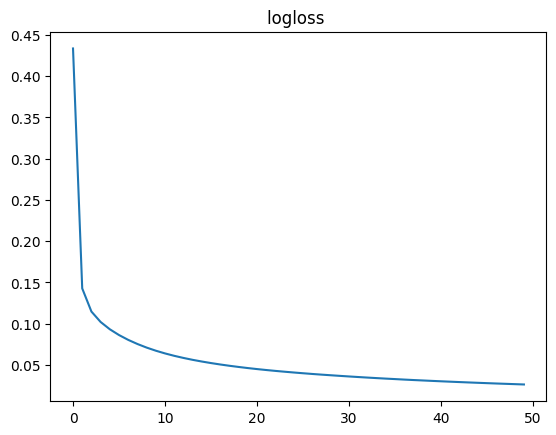

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("logloss ") 
plt.plot(np.array(train_loss))